# Database interaction

In [1]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
import seaborn as sns
import os
#import sys

from utils.db_utils import get_db_absolute_path
from database.queries import QUERY_CREATE_VIEW_RANK_TEST__GROUPED, QUERY_CREATE_VIEW_TRACE_METADATA_DEPTH__GROUPED, \
QUERY_QUALITY_TABLE

In [2]:
# Setup sqlite connection
database = get_db_absolute_path("main.db")
con = lite.connect(database)

In [3]:
# Create view
con.execute(QUERY_CREATE_VIEW_RANK_TEST__GROUPED)
con.execute(QUERY_CREATE_VIEW_TRACE_METADATA_DEPTH__GROUPED)
con.execute(QUERY_QUALITY_TABLE)
#con.execute("drop view quality_table;")
#con.execute("drop view rank_test__grouped;")
#con.execute("drop view trace_metadata_depth__grouped;")

In [4]:
query = """
select 
    * 
from 
    quality_table 
where 
    trace_process_id=2 
    and epoch=65
    and
    (additive_noise_method_id IS NULL OR
    additive_noise_method_id=4 OR
    additive_noise_method_id=6 OR
    additive_noise_method_id=10)
ORDER BY
    additive_noise_method_id
;"""
data = pd.read_sql_query(query, con)
data.fillna("None",inplace=True)
data["dyn_range"] = data["max_max"] - data["min_min"]
data

,test_dataset_id,environment_id,distance,device,epoch,additive_noise_method_id,count_term_p,avg_term_p,trace_process_id,max_max,min_min,avg_mean,avg_rms,dyn_range
0,1,1,15.0,10,65,None,316,324.518987,2,0.035055,0.000216,0.007659,0.007735,0.034839
1,1,1,15.0,10,65,None,190,355.036842,2,0.035055,0.000216,0.007659,0.007735,0.034839
2,2,1,2.0,10,65,None,105,474.028571,2,0.014704,0.000458,0.005843,0.005907,0.014246
3,1,1,15.0,8,65,None,315,604.203175,2,0.025780,0.000437,0.007029,0.007101,0.025343
4,1,1,15.0,7,65,None,210,650.509524,2,0.025296,0.000000,0.007060,0.007134,0.025296
5,1,1,15.0,8,65,None,190,659.484211,2,0.025780,0.000437,0.007029,0.007101,0.025343
6,1,1,15.0,7,65,None,190,692.789474,2,0.025296,0.000000,0.007060,0.007134,0.025296
7,1,1,15.0,6,65,None,183,755.169399,2,0.014852,0.000398,0.006266,0.006334,0.014454
8,1,1,15.0,9,65,None,311,779.919614,2,0.030896,0.000000,0.007029,0.007102,0.030896
9,2,1,2.0,9,65,None,107,826.355140,2,0.014492,0.001101,0.006773,0.006839,0.013391


/usr/local/Caskroom/miniconda/base/envs/master_thesis_1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dyn_range', ylabel='avg_term_p'>

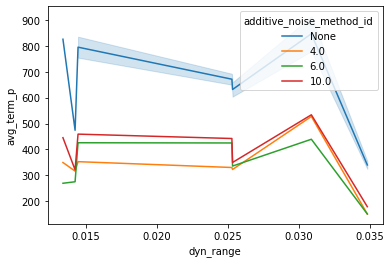

In [5]:
#data.plot(x="avg_mean", y="avg_term_p", kind="scatter")
sns.lineplot(data["dyn_range"], data["avg_term_p"], hue=data["additive_noise_method_id"])